In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()
G = nx.powerlaw_cluster_graph(n=10, m=2, p=0.1, seed=143)
G = nx.powerlaw_cluster_graph(n=10, m=2, p=0.1, seed=143)

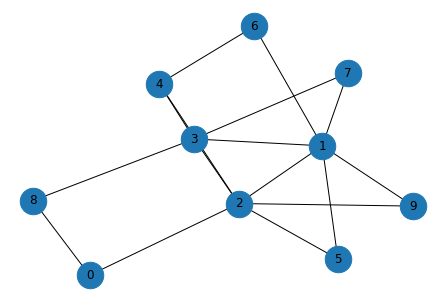

In [2]:
nx.draw(G, with_labels=True, node_size=700)
plt.show()

In [13]:
print(np.random.random())
        
for v in G.nodes():
    #assign_credit(v)
    G.nodes[v]['creditw'] = False
    G.nodes[v]['recommender'] = None
    G.nodes[v]['round_visited'] = None
    if np.random.random() > 0.6:
        G.nodes[v]['creditw'] = True

#def assign_credit(v):
    
        
print(G.nodes(data=True))
colors = [G.nodes[n]['creditw'] for n in G.nodes]
#print(colors)
print(G.nodes)

0.36588538448715546
[(0, {'creditw': True, 'recommender': None, 'round_visited': None}), (1, {'creditw': True, 'recommender': None, 'round_visited': None}), (2, {'creditw': True, 'recommender': None, 'round_visited': None, 'round_visit': 1}), (3, {'creditw': True, 'recommender': None, 'round_visited': None, 'round_visit': 4}), (4, {'creditw': True, 'recommender': None, 'round_visited': None}), (5, {'creditw': True, 'recommender': None, 'round_visited': None, 'round_visit': 2}), (6, {'creditw': False, 'recommender': None, 'round_visited': None}), (7, {'creditw': False, 'recommender': None, 'round_visited': None, 'round_visit': 4}), (8, {'creditw': False, 'recommender': None, 'round_visited': None}), (9, {'creditw': False, 'recommender': None, 'round_visited': None, 'round_visit': 2})]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


10
True
[0, 1, 3, 4, 5, 9]


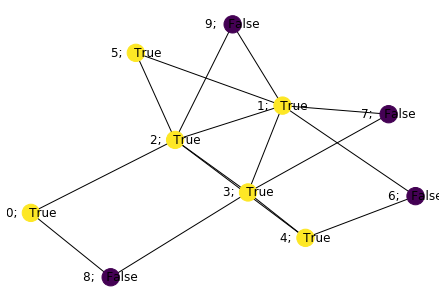

In [14]:
labels = {n: str(n) + ';   ' + \
          str(G.nodes[n]['creditw']) for n in G.nodes}

#val_map = {n: G.nodes[n]['creditw'] for n in G.nodes}
# values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, with_labels=True, labels=labels, node_color=colors)
print(G.number_of_nodes())
print(G.nodes[2]['creditw'])
print(list(G.neighbors(2)))

In [49]:
rec_start = set([2,3])
currently_checking = rec_start
#for i in rec_start:
    #current_rec_list.append(G.nodes[i])
visited_list = set([])
round_num = 0
next_round = set([])

while len(visited_list) < G.number_of_nodes():
    round_num += 1 
    print('round num, visitied list', round_num, visited_list)
    
    for i in currently_checking:
        visited_list.add(i)
        G.nodes[i]['round_visited'] = round_num
        for neigh in G.neighbors(i): 
            if G.nodes[neigh]['creditw'] == True and G.nodes[neigh]['round_visited'] is None: # not visited yet
                #print('they were credit worth, check next round')
                next_round.add(neigh)
            else:
                pass # recommender lied :(
    if len(next_round) == 0:
        print('We hit a dead end :( ')
        break
    print('just checked, ', currently_checking)
    print('next checked, ', next_round )
    currently_checking = next_round
    next_round = set([])
        
print('Done, round numbs = ', round_num)
print('% Nodes visited', len(visited_list) / G.number_of_nodes())



round num, visitied list 1 set()
We hit a dead end :( 
Done, round numbs =  1
% Nodes visited 0.2


[(0, {'creditw': True, 'recommender': None, 'round_visited': 2, 'round_visit': 5526}), (1, {'creditw': True, 'recommender': None, 'round_visited': 2, 'round_visit': 5526}), (2, {'creditw': True, 'recommender': None, 'round_visited': 1, 'round_visit': 5526}), (3, {'creditw': True, 'recommender': None, 'round_visited': 1, 'round_visit': 5526}), (4, {'creditw': True, 'recommender': None, 'round_visited': 3, 'round_visit': 5526}), (5, {'creditw': True, 'recommender': None, 'round_visited': 3, 'round_visit': 5526}), (6, {'creditw': False, 'recommender': None, 'round_visited': None}), (7, {'creditw': False, 'recommender': None, 'round_visited': None, 'round_visit': 4}), (8, {'creditw': False, 'recommender': None, 'round_visited': None}), (9, {'creditw': False, 'recommender': None, 'round_visited': None, 'round_visit': 2})]


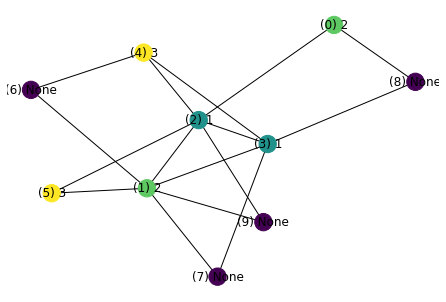

In [51]:
print(G.nodes(data=True))
colors = []
# TODO : color correctly by round
#colors = [G.nodes[n]['round_visited'] for n in G.nodes]
labels = {n: '(' + str(n) + ') '  + \
          str(G.nodes[n]['round_visited']) for n in G.nodes}

for n in G.nodes:
    if G.nodes[n]['round_visited'] != None:
        colors.append(G.nodes[n]['round_visited'])
    else:
        colors.append(-1)

#print(colors)
#plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, labels=labels, node_color=colors, cmap=plt.get_cmap('viridis'))
plt.show()

In [ ]:
colors = [G.nodes[n]['visited1'] for n in G.nodes]
nx.draw(G, with_labels=True, labels=labels, node_color=colors)